# Atlas notebooks

***

> This notebook reproduces and extends parts of the figures and products of the AR6-WGI Atlas. It is part of a notebook collection available at https://github.com/IPCC-WG1/Atlas for reproducibility and reusability purposes. This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0).
>
> ![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Using the Atlas reference grids in R

11/02/2020

**M. Iturbide** ([Santander Meteorology Group](http://meteo.unican.es), Instituto de Física de Cantabria, CSIC-UC, Santander, Spain)

This is a simple example where the Atlas reference grids are used in R for both interpolation and land/sea separation of global model output from CMIP6.

### Load libraries

In this simple example we will only use the climate4R libraries:

 * `loadeR` to load data
 * `visualizeR` to display the results

In [ ]:
library(loadeR)
library(visualizeR)

### Load the reference grid/mask

In [2]:
mask <- loadGridData("../reference-grids/land_sea_mask_1degree.nc4", var = "sftlf")

[2021-07-21 18:25:50] Defining geo-location parameters

[2021-07-21 18:25:50] Defining time selection parameters

NOTE: Undefined Dataset Time Axis (static variable)

[2021-07-21 18:25:50] Retrieving data subset ...

[2021-07-21 18:25:50] Done



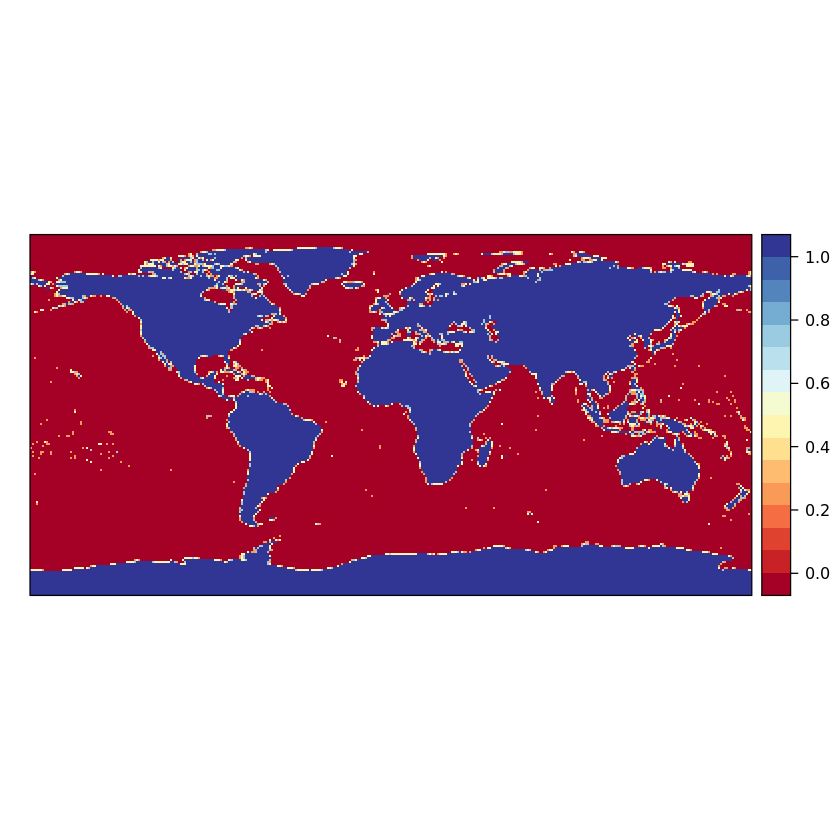

In [3]:
spatialPlot(mask)

### Load model data

Here we use the example data file provided in the auxiliary-material folder

In [4]:
tas <- loadGridData("auxiliary-material/CMIP6Amon_tas_CanESM5_r1i1p1f1_historical_gn_185001-201412.nc", var = "tas", years = 1995:2014)


[2021-07-21 18:25:53] Defining geo-location parameters

[2021-07-21 18:25:53] Defining time selection parameters

[2021-07-21 18:25:53] Retrieving data subset ...

[2021-07-21 18:25:57] Done



[2021-07-21 18:25:58] - Computing climatology...

[2021-07-21 18:25:58] - Done.



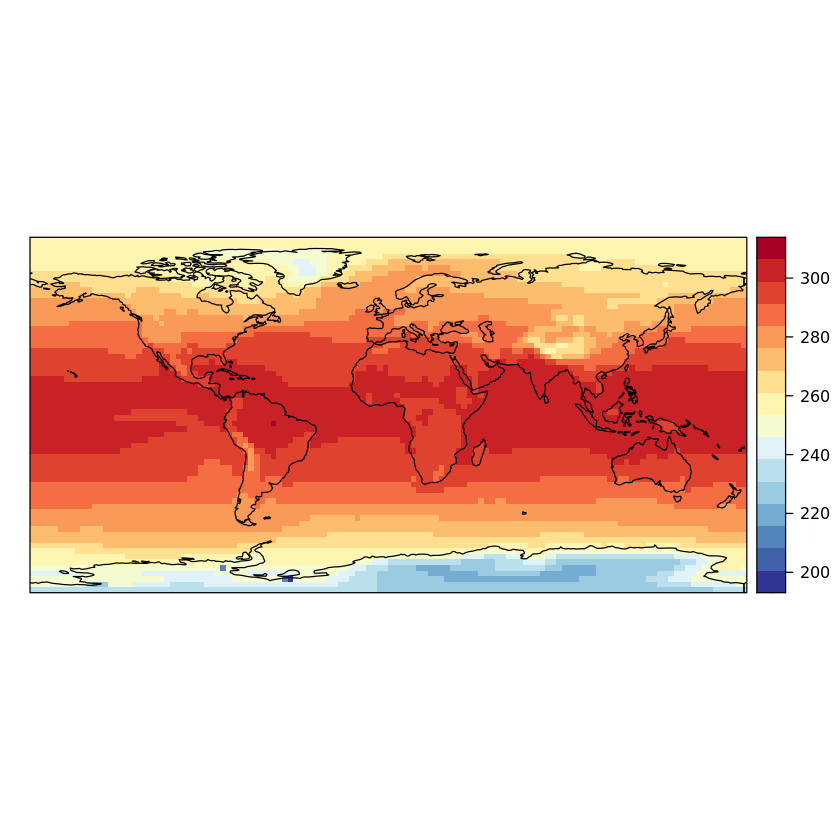

In [5]:
spatialPlot(climatology(tas), backdrop.theme = "coastline", rev.colors = TRUE)

### Interpolation

The function `interpGrid` interpolates a data Grid to a new grid. We can use the `getGrid` function to retrieve the grid information from another gridded data set (the land-sea mask in this case).

In [6]:
tas.i <- interpGrid(tas, getGrid(mask), method = "bilinear")

Warning message in interpGrid(tas, getGrid(mask), method = "bilinear"):
“The new longitudes are outside the data extent”
Warning message in interpGrid(tas, getGrid(mask), method = "bilinear"):
“The new latitudes are outside the data extent”
[2021-07-21 18:25:59] Performing bilinear interpolation... may take a while

[2021-07-21 18:26:37] Done



### Apply the mask to the data

The `binaryGrid` function assigns two user-provided values (here NA and 1) based on a threshold and condition. In this way, we obtain a grid with value 1 for the land grid cells and NA for the sea ones, using a 0.999 (99.9%) land fraction as threshold.

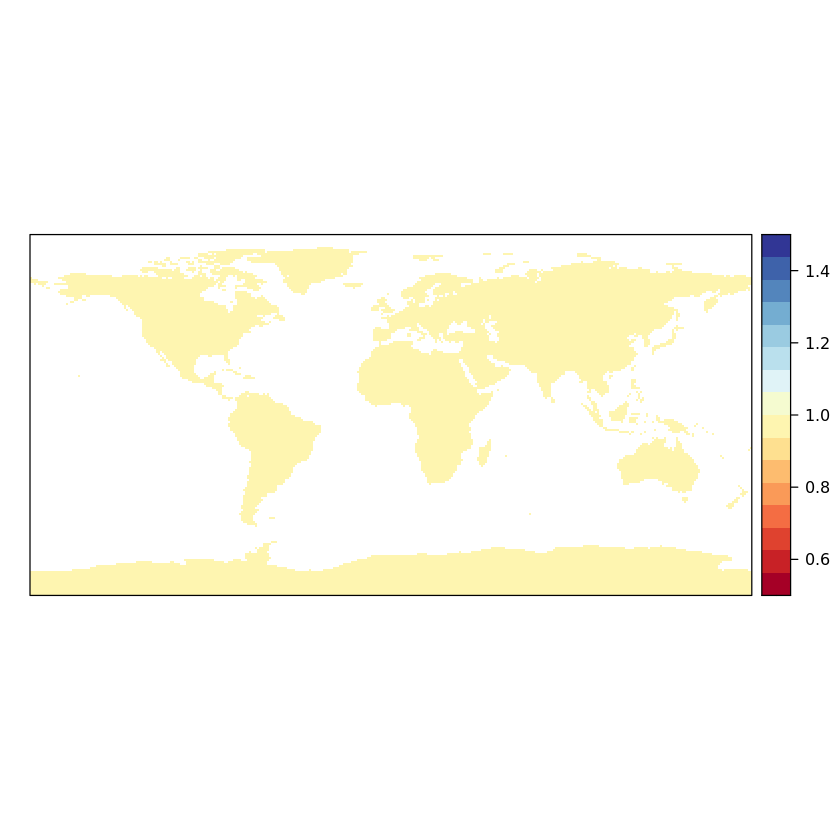

In [7]:
land <- binaryGrid(mask, condition = "GT", threshold = 0.999, values = c(NA, 1))
spatialPlot(land)

We need to have the same array dimensions in the mask to be applied and the target data. Here we resize the mask to match the time dimension of the target data:

In [8]:
masktimes <- rep(list(land), getShape(tas, "time"))
mask2apply <- bindGrid(masktimes, dimension = "time")

Warning message in value[[3L]](cond):
“time dimension could not be sorted!”


At this point we are able to apply `gridArithmetics`, here performing the multiplication of the mask and the target data.

In [ ]:
tas.i.land <- gridArithmetics(tas.i, mask2apply, operator = "*")

And we are ready to display the results.

In [ ]:
spatialPlot(climatology(tas.i.land), rev.colors = TRUE)

### Masked time series

Next we compare the time series of the global mean temperature for land and sea (non masked: `tas.i`) and for land only(masked: `tas.i.land`):

In [ ]:
temporalPlot(tas.i, tas.i.land, x.axis = "index")

Function `gridArithmetics` can be used for any arithmetic operation among climate4R grids and values, e.g. for unit changing:

In [ ]:
tas.i.land.degC <- gridArithmetics(tas.i.land, 273.15, operator = "-")
tas.i.degC <- gridArithmetics(tas.i, 273.15, operator = "-")
temporalPlot(tas.i.degC, tas.i.land.degC, x.axis = "index")

### Session info

In [ ]:
sessionInfo()